## Obtención y preparación del dataset

Los datasets serán representados como tensores.
El tensor de entrada a la red tendra rango 4: número de imágenes, alto de la imagen, anchon de la imagen y canales de color.

Por ejemplo, En el caso del del tensor de entrenamiento (train_images) tenemos el primer rango de 60000 dimensiones, pues hay 60000 imágenes. Los 2 siguientes rangos son los que dan el tamaño de las imágenes (de 32 dimensiones cada uno). El 4o rango que tendrá el canal de color tendrá tres dimensiones (RGB). Cada valor del tensor de 32x32x3 es una valor en escala de 0 a 255.

Necesitamos que los datos de entrenamiento y test estén en el formato dado por la capa de entrada de la red que vamos a definir.

In [41]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
print (train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
# print(train_images)

Modificamos las escalas de colores (0 a 255) con valores en una escala que vaya de 0 a 1 y que sean entonces de tipo flotantes.

Finalmente, convertimos los labels de arrays one hot encoded.


In [42]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Definición del modelo

Vamos a definir un modelo:
* que recibe un tensor con las instancias de imágen con tres ejes con la dimensionalidad (32, 32, 3), 
* con 3 capas convolucionales 2D, todas con filtros 3x3 y función de activación RELU; la primera con 32 filtros, la segunda con 64 filtros, y la tercera con 128 filtros.
* con 3 capas intermedias de MAX pooling que toman las salidas de las capas convolucionales.
* con una capa Flatten que permite cambiar la representación de las salidas de las capas convolucionales a un tensor de un solo eje
* con dos capas Dense, fully connected, la primera con 512 neuronas y RELU, la segunda, la capa de salida, con 10 neuronas que utilizan una función softmax para clasificar las instancias en diez clases.
* una capa de dropout entre las capas densas con probabilidad de 30%.

In [43]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

## Entrenamiento del modelo

El modelo final tiene en total 361.034 parámetros. Lo compilamos utilizando un optimizador **rmsprop** y una función de activación **categorical_cross_entropy**, y lo entrenamos con 5 épocas con el set de entrenamiento ya procesado.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 98s 2ms/step - loss: 1.6512 - acc: 0.3991 - val_loss: 1.7211 - val_acc: 0.4014
Epoch 2/20
45000/45000 [==============================] - 104s 2ms/step - loss: 1.2265 - acc: 0.5667 - val_loss: 1.3447 - val_acc: 0.5232
Epoch 3/20
 8960/45000 [====>.........................] - ETA: 1:21 - loss: 1.0512 - acc: 0.6275

Grabamos el modelo a disco

In [20]:
model_path = "cifar10.h5"
model.save(model_path)

## Evaluación de los resultados del modelo

Vamos a analizar la evaluación del rendimiento del modelo durante las épocas de aprendizaje

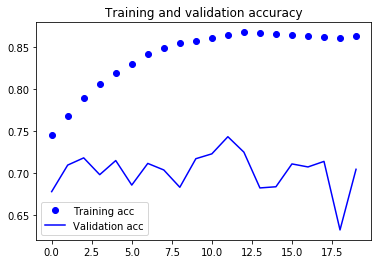

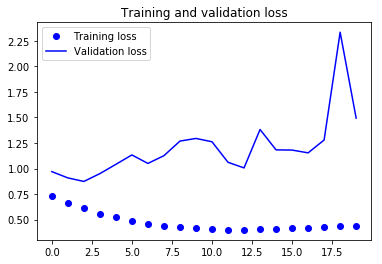

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluación de los resultados del modelo

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 395us/step


In [10]:
test_acc

0.9917

El modelo convolucional llega a un nivel de exactitud de mas del 99% en 20 épocas, utilizando una capa de regularización a partir de dropout (30%)

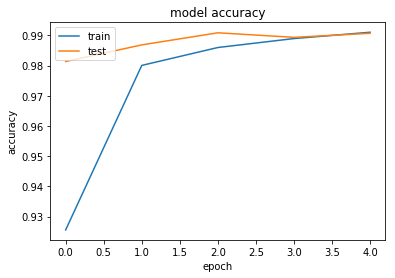

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

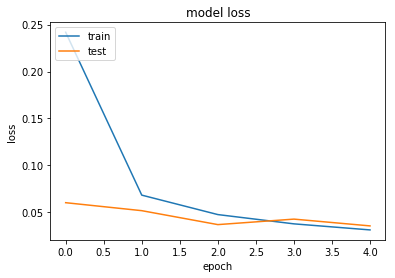

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Transfer Learning

In [26]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))


conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [23]:
datagen = ImageDataGenerator()
batch_size = 64

In [32]:
# Esta función realiza el procesamiento de las imágenes generadas por datagen.flow().
# Se define un número de imágenes deseado, pues los generadores son infinitos.
# Además puede servir para la extracción con un generador de data augmentation.
# Retorna tanto los tensores con los features como los labels correspondientes.
def extract_features(sample_count, images, labels):
    features = np.zeros(shape=(sample_count, 1, 1, 512))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow(images, labels,
                                     batch_size=batch_size)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Es necesario explicitar el break, ya que los generadores son infinitos en su generación
            break
    return features, labels

In [33]:
train_features, train_labels = extract_features(50000, train_images, train_labels)
test_features, test_labels = extract_features(10000, test_images, test_labels)

Las características extraídas son tensores de tipo (samples, 1, 1, 512), se van a aplanar a un tensor de tipo (samples, 512).

In [34]:
train_features = np.reshape(train_features, (50000, 512))
test_features = np.reshape(test_features, (10000, 512))

Ahora definimos la red fully connected con una capa final de clasificacón con una función de activación softmax, agregando regularización a partir de una capa de Dropout al 50\%, y la entrenamos con 20 épocas.

In [37]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=batch_size,
                    validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 4s 82us/step - loss: 2.3278 - acc: 0.1596 - val_loss: 2.0321 - val_acc: 0.3430
Epoch 2/100
45000/45000 [==============================] - 3s 73us/step - loss: 2.0408 - acc: 0.2705 - val_loss: 1.8602 - val_acc: 0.4066
Epoch 3/100
45000/45000 [==============================] - 3s 69us/step - loss: 1.8916 - acc: 0.3383 - val_loss: 1.7501 - val_acc: 0.4342
Epoch 4/100
45000/45000 [==============================] - 3s 74us/step - loss: 1.7974 - acc: 0.3752 - val_loss: 1.6769 - val_acc: 0.4538
Epoch 5/100
45000/45000 [==============================] - 3s 69us/step - loss: 1.7322 - acc: 0.3987 - val_loss: 1.6218 - val_acc: 0.4654
Epoch 6/100
45000/45000 [==============================] - 3s 71us/step - loss: 1.6838 - acc: 0.4144 - val_loss: 1.5797 - val_acc: 0.4736
Epoch 7/100
45000/45000 [==============================] - 3s 77us/step - loss: 1.6477 - acc: 0.4273 - val_loss: 1.5460 - v

45000/45000 [==============================] - 3s 77us/step - loss: 1.2449 - acc: 0.5680 - val_loss: 1.2136 - val_acc: 0.5816
Epoch 60/100
45000/45000 [==============================] - 4s 86us/step - loss: 1.2426 - acc: 0.5697 - val_loss: 1.2124 - val_acc: 0.5820
Epoch 61/100
45000/45000 [==============================] - 4s 82us/step - loss: 1.2416 - acc: 0.5703 - val_loss: 1.2102 - val_acc: 0.5840
Epoch 62/100
45000/45000 [==============================] - 4s 83us/step - loss: 1.2379 - acc: 0.5713 - val_loss: 1.2087 - val_acc: 0.5848
Epoch 63/100
45000/45000 [==============================] - 3s 75us/step - loss: 1.2363 - acc: 0.5725 - val_loss: 1.2067 - val_acc: 0.5856
Epoch 64/100
45000/45000 [==============================] - 4s 87us/step - loss: 1.2340 - acc: 0.5742 - val_loss: 1.2059 - val_acc: 0.5872
Epoch 65/100
45000/45000 [==============================] - 4s 81us/step - loss: 1.2319 - acc: 0.5736 - val_loss: 1.2036 - val_acc: 0.5876
Epoch 66/100
45000/45000 [==============

Veamos los resultados del modelo.

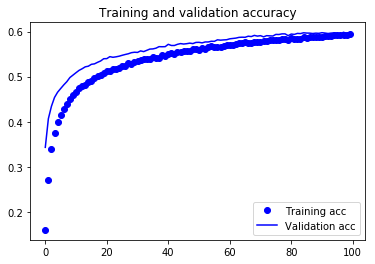

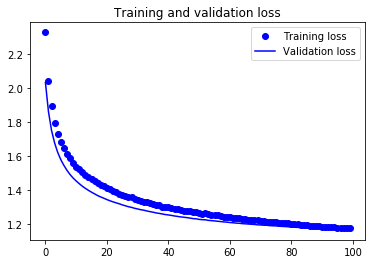

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluación de los resultados del modelo

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 395us/step


In [10]:
test_acc

0.9917

Teniendo en cuenta el resultado obtenido con el modelo de red neuronal tradicional (98%), el modelo convolucional lo mejora, llegando a un nivel de exactitud de mas del 99% en tan solo 5 épocas, utilizando una capa de regularización a partir de dropout.

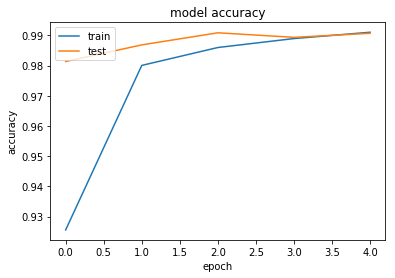

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

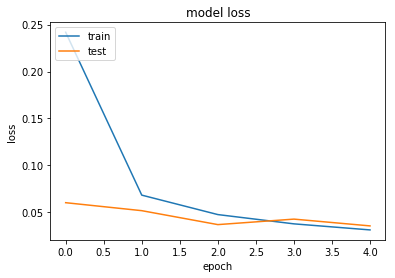

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()